<a href="https://colab.research.google.com/github/Saroramath/MachineLearning/blob/main/6205/IntroductionKerasMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load the raw data
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds_train

<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [ ]:
tf.data

<module 'tensorflow._api.v2.data' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/data/__init__.py'>

In [ ]:
# Step 2: Build the training/testing pipelines
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# Step 3: Create the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Step 4: Train the model
hist = model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
)

Epoch 1/20
469/469 [==============================] - 10s 7ms/step - loss: 0.6083 - accuracy: 0.8320 - val_loss: 0.2012 - val_accuracy: 0.9405
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1730 - accuracy: 0.9502 - val_loss: 0.1428 - val_accuracy: 0.9573
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1200 - accuracy: 0.9663 - val_loss: 0.1176 - val_accuracy: 0.9644
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0947 - accuracy: 0.9731 - val_loss: 0.0981 - val_accuracy: 0.9703
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0749 - accuracy: 0.9783 - val_loss: 0.0940 - val_accuracy: 0.9725
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0619 - accuracy: 0.9827 - val_loss: 0.0831 - val_accuracy: 0.9735
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0547 - accuracy: 0.9845 - val_loss: 0.0803 - val_accuracy: 0.9760
Epoch

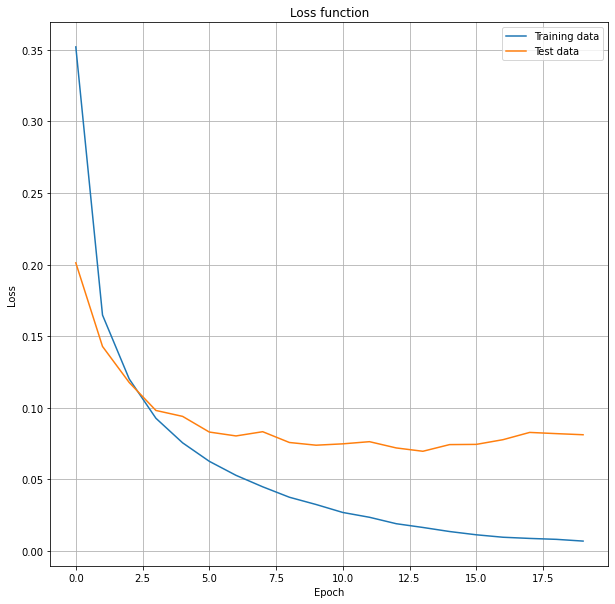

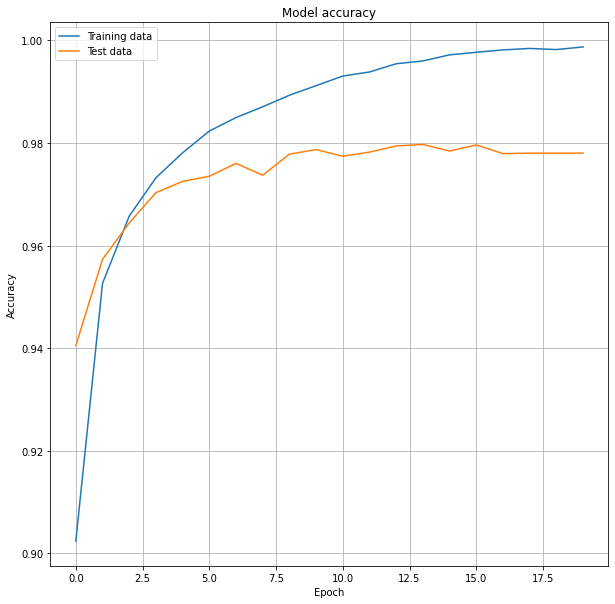

In [ ]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Test data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Test data'])

In [ ]:
# Step 5/6: Evaluate the model (we do no hyperparameter tuning here)
loss_accuracy = model.evaluate(ds_test, verbose=0)

print("Test Loss: {}".format(loss_accuracy[0]))
print("Test Accuracy: {}".format(loss_accuracy[1]))

Test Loss: 0.08117455244064331
Test Accuracy: 0.9779999852180481


In [ ]:
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()